In [2]:
from mp_api.client import MPRester
import logging
import os
logger = logging.getLogger(__name__)

API_KEY = os.getenv("MP_API_KEY")




    

In [ ]:
with MPRester(API_KEY) as mpr:
    docs = mpr.materials.summary.search(elements=["Si", "O"], band_gap=(0.5, 1.0))

In [5]:
print(docs)

[MPDataDoc<SummaryDoc>(
builder_meta=EmmetMeta(emmet_version='0.84.7rc1', pymatgen_version='2025.3.10', run_id='13d67e62-d65a-4ffc-8b7f-d2d2e0041e70', batch_id='jmunro_static_calculations', database_version='2025.04.10', build_date=datetime.datetime(2025, 4, 3, 20, 12, 29, 275000), license='BY-C'),
nsites=48,
elements=[Element O, Element Si],
nelements=2,
composition=Composition('Si16 O32'),
composition_reduced=Composition('Si1 O2'),
formula_pretty='SiO2',
formula_anonymous='AB2',
chemsys='O-Si',
volume=975.3631352517338,
density=1.636679902657333,
density_atomic=20.320065317744454,
symmetry=SymmetryData(crystal_system=<CrystalSystem.mono: 'Monoclinic'>, symbol='C2/m', number=12, point_group='2/m', symprec=0.1, angle_tolerance=5.0, version='2.6.0'),
property_name='summary',
material_id=MPID(mp-34150),
deprecated=False,
deprecation_reasons=None,
last_updated=datetime.datetime(2025, 4, 9, 17, 10, 44, 176000),
origins=[PropertyOrigin(name='structure', task_id=MPID(mp-1325447), last_update

In [3]:
from mp_api.client import MPRester
from emmet.core.electronic_structure import BSPathType

with MPRester(API_KEY) as mpr:
    # -- line-mode, Setyawan-Curtarolo (default):
    bs_sc = mpr.get_bandstructure_by_material_id("mp-149")
    
    # -- line-mode, Hinuma et al.:
    bs_hin = mpr.get_bandstructure_by_material_id("mp-149", path_type=BSPathType.hinuma)

    # -- line-mode, Latimer-Munro:
    bs_hin = mpr.get_bandstructure_by_material_id("mp-149", path_type=BSPathType.latimer_munro)
    
    # -- uniform:
    bs_uniform = mpr.get_bandstructure_by_material_id("mp-149", line_mode=False)                            

Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 4629.47it/s]


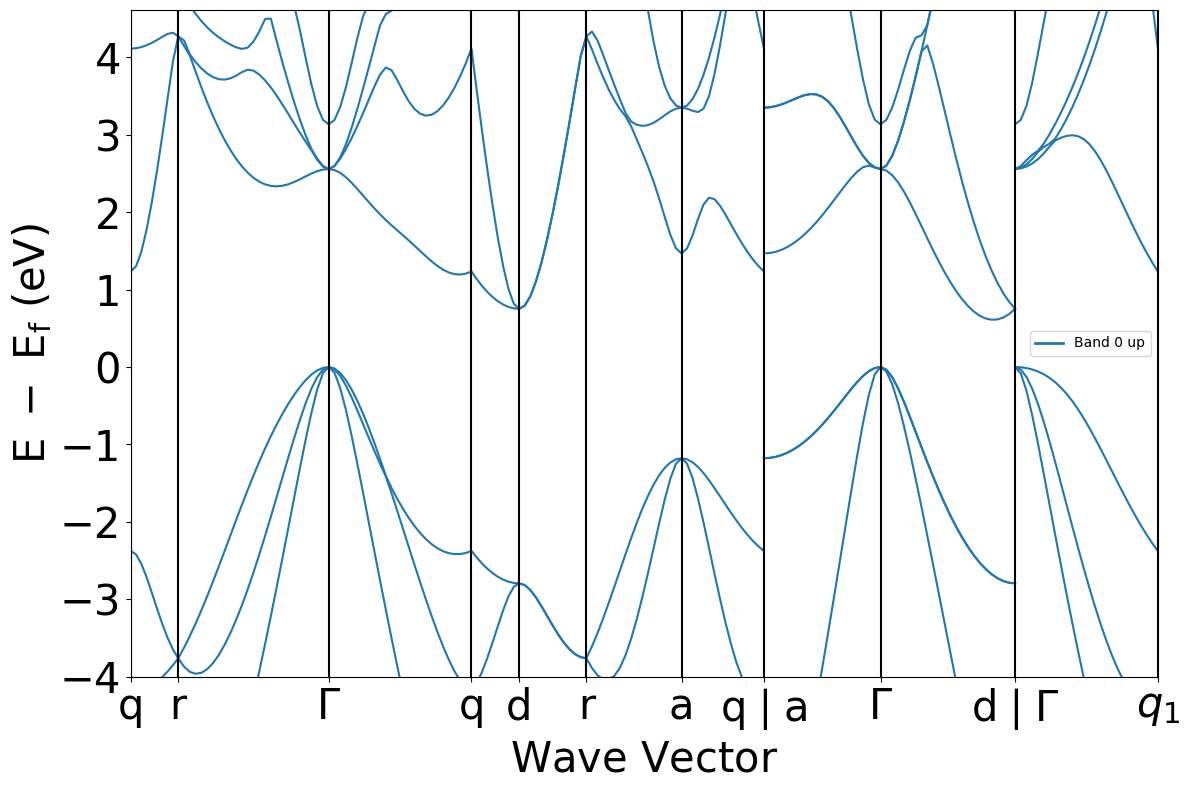

In [7]:
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt

#bs_plotter = BSPlotter(bs_sc)
#bs_plotter.get_plot()
#plt.show()


bs_hin_plotter = BSPlotter(bs_hin)
bs_hin_plotter.get_plot()
plt.show()





Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 5526.09it/s]


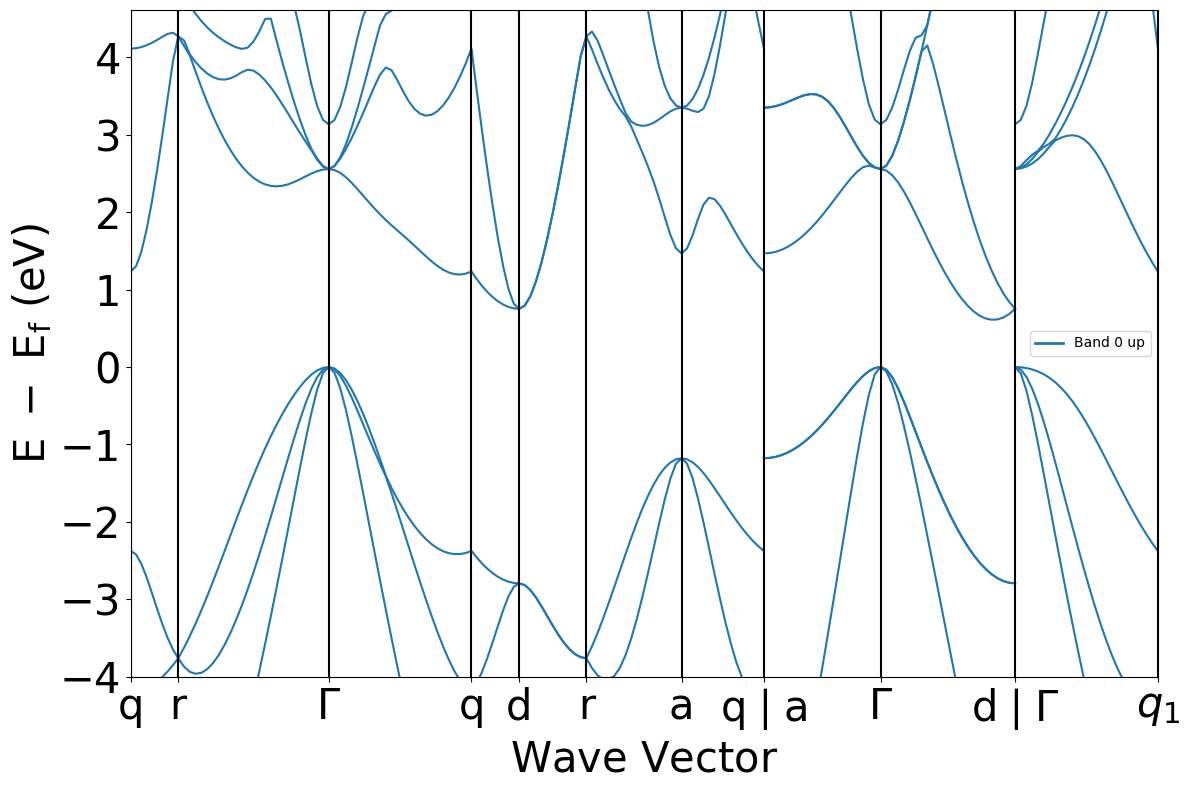

In [ ]:
from mp_api.client import MPRester
from emmet.core.electronic_structure import BSPathType
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine

import matplotlib.pyplot as plt
import io
import base64
from IPython.display import Image, display


material_id = "mp-149"
path_type = "latimer_munro"  # or setyawan_curtarolo, hinuma, latimer_munro

with MPRester(API_KEY) as mpr:
    bs = mpr.get_bandstructure_by_material_id(
        material_id,
        path_type=BSPathType(path_type)
    )

if not isinstance(bs, BandStructureSymmLine):
    print(f"Band structure for path_type `{path_type}` is not plottable.")
else:
    plotter = BSPlotter(bs)
    ax = plotter.get_plot()
    fig = ax.get_figure()

    buf = io.BytesIO()
    fig.savefig(buf, format="png", bbox_inches="tight")
    plt.close(fig)
    buf.seek(0)

    display(Image(data=buf.getvalue()))
